# Explicación inicial de Regresión lineal

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Septiembre de 2024  
**Versión:** 1.0  

**Fecha de Actualización:** Abril de 2025  
**Versión:** 2.0  


**Fecha de Actualización:** Septiembre de 2025  
**Versión:** 3.0  
---

## Descripción

Este notebook muestra un ejemplo para explicar el concepto de regresión lineal, se explica lo que se realiza cuando se aplica un algoritmo de regresión lineal, en este caso, el más sencillo de todos.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)

Para verificar si está instalado pandas, numpy o matplotlib ejecutar:

```bash
pip show pandas
```

```bash
pip show numpy
```

```bash
pip show matplotlib
```

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

# Ejemplo básico

## Datos de ejemplo
+ Se trabaja con un conjunto simple de puntos
+ X representa los valores de entrada (variable independiente)
+ y representa los valores a predecir (variable dependiente)

## Gráfica inicial

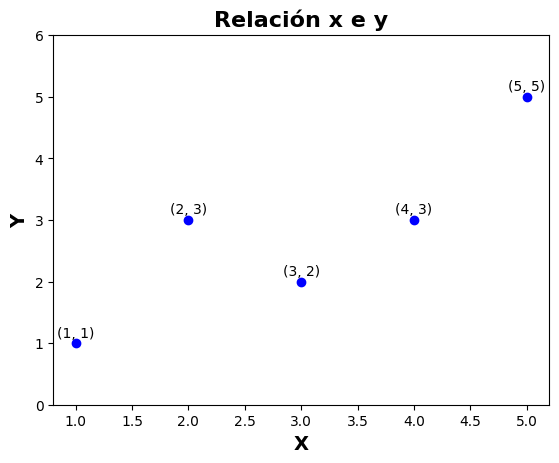

In [6]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape convierte el array en columna
y = np.array([1, 3, 2, 3, 5])

# Graficar los puntos originales
plt.scatter(X, y, color='blue', label='Puntos')
# Etiquetas y título del gráfico
plt.xlabel('X', fontsize=14, fontweight="bold")
plt.ylabel('Y', fontsize=14, fontweight="bold")
plt.title('Relación x e y', fontsize=16, fontweight="bold")

# Mostrar las coordenadas sobre cada punto
for i in range(len(X)):
    plt.text(X[i], y[i] + 0.1, f"({X[i][0]}, {y[i]})",
             ha='center', fontsize=10, color='black')

# Ajustar escala del eje Y
plt.ylim(min(y) - 1, max(y) + 1)
plt.show()

## Explicación del concepto de regresión lineal

---

🎯 La idea es obtener la `mejor` recta que se ajuste a todos los puntos del gráfico anterior.

✅ Recordar que la ecuación de una recta está dada por $y = mx + b$ donde:
+ $x$ es la **variable independiente**
+ $y$ es la **variable dependiente**
+ $m$ es la *pendiente de la recta*
+ $b$ es el *intercepto* o también llamada *ordenada al origen*, es decir, el punto donde la recta `corta al eje y`

✅ Entonces, ¿en qué consiste la regresión lineal?: consiste en encontrar los `mejores` valores para $m$ y $b$ que den la `mejor` recta.

✅ Lo anterior se conoce como `entrenamiento del modelo`

Pendiente o coeficiente (m): 0.80
Intersección con el eje Y (b): 0.40


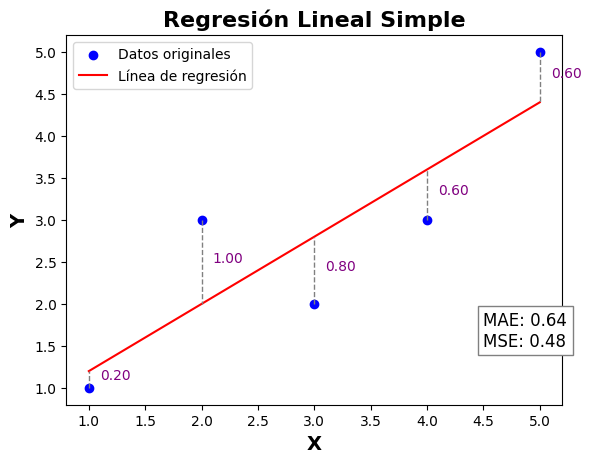

In [7]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape convierte el array en columna
y = np.array([1, 3, 2, 3, 5])

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Realizar predicciones (en este caso predice para los mismos puntos)
y_pred = modelo.predict(X)

# Mostrar los resultados
print("Pendiente o coeficiente (m): {:.2f}".format(modelo.coef_[0]))
print("Intersección con el eje Y (b): {:.2f}".format(modelo.intercept_))

# Calcular métricas
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Graficar los puntos originales
plt.scatter(X, y, color='blue', label='Datos originales')

# Graficar la línea de regresión
plt.plot(X, y_pred, color='red', label='Línea de regresión')

# Dibujar líneas de error
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--', linewidth=1)
    # Etiqueta para el error
    error = abs(yi - ypi)
    plt.text(xi + 0.1, (yi + ypi) / 2, f"{error:.2f}", fontsize=10, color='purple')

# Agregar métricas al gráfico
plt.text(max(X) - 0.5, min(y) + 0.5, f"MAE: {mae:.2f}\nMSE: {mse:.2f}", fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='gray'))

# Etiquetas y título del gráfico
plt.xlabel('X', fontsize=14, fontweight="bold")
plt.ylabel('Y', fontsize=14, fontweight="bold")
plt.title('Regresión Lineal Simple', fontsize=16, fontweight="bold")
plt.legend()

# Mostrar gráfico
plt.show()


Esto significa que la línea de regresión es:

$y = 0.8x + 0.4$


## Entendiendo el concepto de error

In [9]:
# Cálculo del error (valor real - valor predicho)
error = y - y_pred

# Crear un DataFrame para mostrar los resultados
tabla = pd.DataFrame({
    'X': np.array([1, 2, 3, 4, 5]),
    'Y (Real)': y,
    'Y (Predicho)': y_pred,
    'Error': error
})

# Mostrar la tabla
tabla

,X,Y (Real),Y (Predicho),Error
0,1,1,1.2,-0.2
1,2,3,2.0,1.0
2,3,2,2.8,-0.8
3,4,3,3.6,-0.6
4,5,5,4.4,0.6


In [10]:
# Cálculo manual del MSE
mse_manual = np.mean((y - y_pred) ** 2)

# Cálculo del MSE usando scikit-learn
mse_sklearn = mean_squared_error(y, y_pred)

# Mostrar ambos resultados
print(f"MSE calculado manualmente: {mse_manual : .2f}")
print(f"MSE calculado con scikit-learn: {mse_sklearn : .2f}")

MSE calculado manualmente:  0.48
MSE calculado con scikit-learn:  0.48


In [34]:
# Funciones para ayudar con la interpretación de las métricas
def interpretacion(algoritmo : str, score : float, contexto : str, caracteristicas : np.array = None):
  """
  Genera la interpretación del rendimiento del modelo
  """
  if not caracteristicas == None:
    return f"""Modelo de regresión {algoritmo}
    {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando: {caracteristicas.values}."""
  else:
    return f"""Modelo de regresión {algoritmo}
      {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando las variables independientes"""

def mae_interpretacion(value : float, contexto : str, modelo : str = "Modelo") -> str:
  """
  Genera la interpretación del MAE
  """
  return f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ± $ {value:.2f} del valor real."

def msle_interpretacion(value : float, contexto : str, modelo : str = "Modelo") -> str:
  """
  Genera la interpretación del MSLE
  """
  return f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ± {value: .2%} del valor real."

In [12]:
score_modelo = modelo.score(X, y)
print(score_modelo)

0.7272727272727273


In [13]:
print(interpretacion("Regresión lineal", score_modelo, "y"))

Modelo de regresión Regresión lineal
      72.73% de la variabilidad en y se puede explicar utilizando las variables independientes


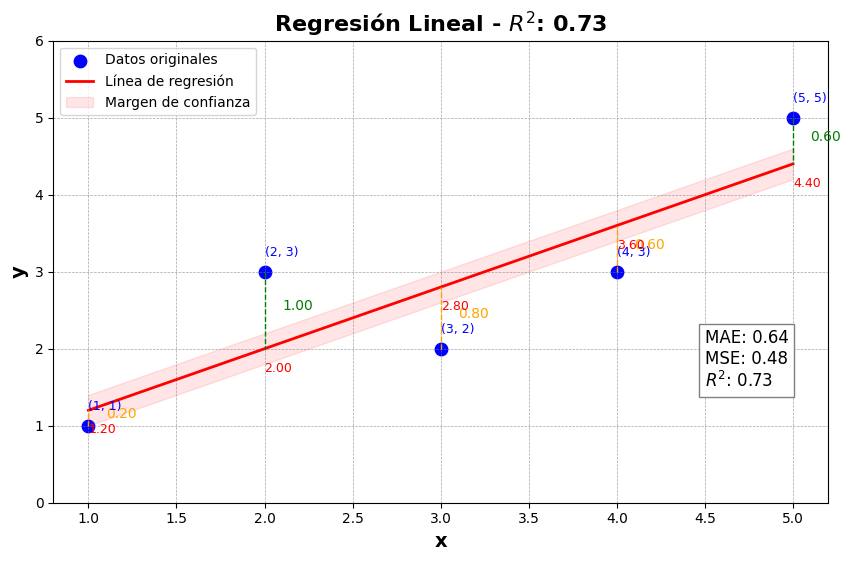

In [16]:
# Gráfico
plt.figure(figsize=(10, 6))

# Puntos originales
plt.scatter(X, y, color='blue', s=80, label='Datos originales')

# Línea de regresión con sombra
plt.plot(X, y_pred, color='red', label='Línea de regresión', linewidth=2)
plt.fill_between(X.flatten(), y_pred - 0.2, y_pred + 0.2, color='red', alpha=0.1, label='Margen de confianza')

# Líneas de error
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    color = 'green' if yi > ypi else 'orange'  # Diferenciar errores positivos y negativos
    plt.plot([xi, xi], [yi, ypi], color=color, linestyle='--', linewidth=1)
    plt.text(xi + 0.1, (yi + ypi) / 2, f"{abs(yi - ypi):.2f}", fontsize=10, color=color)

# Anotaciones
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    plt.text(xi, yi + 0.2, f"({xi}, {yi})", fontsize=9, color='blue')
    plt.text(xi, ypi - 0.3, f"{ypi:.2f}", fontsize=9, color='red')

# Métricas en el gráfico
plt.text(max(X) - 0.5, min(y) + 0.5, f"MAE: {mae:.2f}\nMSE: {mse:.2f}\n$R^2$: {score_modelo:.2f}",
         fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# Estilo del gráfico
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('x', fontsize=14, fontweight="bold")
plt.ylabel('y', fontsize=14, fontweight="bold")
plt.title(f'Regresión Lineal - $R^2$: {score_modelo:.2f}', fontsize=16, fontweight="bold")
plt.legend()

# Ajustar escala del eje Y
plt.ylim(min(y) - 1, max(y) + 1)

# Mostrar gráfico
plt.show()

**¿Qué es el margen de confianza?**

El margen de confianza representa un rango dentro del cual es probable que se encuentren los valores reales de la variable dependiente
$y$, dado un valor de $x$.

Este margen se suele calcular a partir del intervalo de confianza para la media predicha por el modelo lineal.

Esta área da una idea de la incertidumbre asociada a la predicción hecha por el modelo lineal.

**¿Cómo se calcula?**

En regresión lineal (este es el caso) se calcula:

$\hat{y}(x_0) \pm t\times SE(\hat{y}(x_0))$

Donde:

+ $\hat{y}(x_0)$ es la predicción del modelo para $x_0$
+ $SE(\hat{y}(x_0))$ es un error estándar de la predicción en $x_0$
+ $t$ es el valor crítico de la distribución t-student para un cierto nivel de confianza (95% por ejemplo)

**¿Cómo se calcula el error estándar?**

$SE(\hat{y}(x_0))=s\times\sqrt{\frac{1}{n}+\frac{(x_0-\overline{x})^2}{\sum{(x_i-\overline{x})^2}}}$

donde:

+ $s$ es el error estándar residual del modelo
+ $n$ es el número de observaciones
+ $\overline{x}$ es la media de los valores de entrada $x$

Dado que en el gráfico este margen es angosto implica que no hay tanta incertidumbre (un margen más ancho implica mayor incertidumbre, es decir, que se está más lejos del centro de los datos).

**¿Qué es el error estándar residual?**
El error estándar residual (a veces llamado desviación estándar de los residuos) mide cuánto, en promedio, se desvían los valores observados respecto a la línea de regresión. Es una medida de la dispersión de los errores del modelo.

Su fórmula es:

$s=\sqrt(\frac{1}{n-2}\sum_{i=1}^{n}{(y_i-\hat{y})^2})$

donde:

+ $s$ es el error estándar residual
+ $n$ es la cantidad de observaciones
+ $i_i$ corresponde al valor observado
+ $\hat{y}$ corresponde al valor predicho por el modelo
+ $y_i - \hat{y}$ corresponde al error (o residuo) para el i-ésimo dato

**¿Por qué se divide por $n-2$?**

Porque en regresión lineal simple se ajustan 2 parámetros (pendiente y ordenada al origen), así que hay $\frac{n}{2}$ grados de libertad.


**En resumen**

+ El área roja clara muestra el rango dentro del cual se espera que estén los valores predichos para cada $x$, con un cierto nivel de confianza (normalmente 95%).


# Ejemplo con más datos (acercándonos a la realidad)

In [17]:
# Fijar semilla para poder reproducir resultados
np.random.seed(29)

In [18]:
# Crear un rango de valores continuos para la edad
n = 500
edad = np.random.randint(20, 61, size=n)

# Generar sueldos como una función cuadrática de la edad con ruido
sueldo = 2000 + 50 * edad - 0.5 * (edad - 40)**2 + np.random.normal(0, 500, size=n)

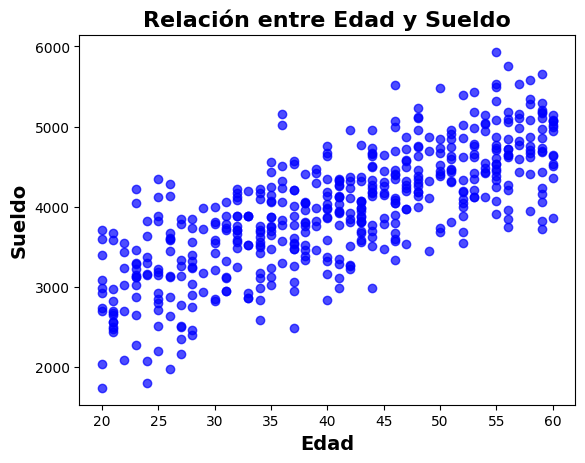

In [19]:
# Crear un DataFrame para los datos
data = pd.DataFrame({'Edad': edad, 'Sueldo': sueldo})

# Visualizar los datos
plt.scatter(data['Edad'], data['Sueldo'], alpha=0.7, color='blue')
plt.title('Relación entre Edad y Sueldo', fontsize=16, fontweight="bold")
plt.xlabel('Edad', fontsize=14, fontweight="bold")
plt.ylabel('Sueldo', fontsize=14, fontweight="bold")
plt.show()

✅ **Interpretaciones**

**Tendencia positiva clara:**

+ A medida que la edad aumenta, también tiende a aumentar el sueldo.

+ Esto sugiere una correlación positiva entre edad y sueldo.

**Mayor dispersión en edades tempranas:**

+ En el rango de 20 a 30 años hay más variabilidad en sueldos.

+ Esto puede deberse a diferentes niveles de experiencia o tipo de empleo en personas jóvenes.

**Sueldo más estable en edades altas:**

+ Desde los 40 años en adelante, los sueldos son más altos y parecen más concentrados en una franja, lo que sugiere una posible estabilización salarial.

**Algunos valores atípicos (outliers):**

+ Hay puntos que están lejos de la "nube principal", tanto por debajo como por encima.

+ Sería interesante investigar esos casos: podrían ser personas con sueldos inusualmente bajos o altos para su edad.

✅ **Algunas hipótesis propuestas:**
+ A mayor edad, más experiencia laboral, lo que conlleva a un mayor sueldo.
+ A partir de cierta edad, los aumentos de sueldo parecen ser más lentos o los sueldos pueden ser más estables.
+ La dispersión en sueldos de personas jóvenes podría darse a distintos niveles de formación/educación o trabajos de jornadas parciales.

In [20]:
# Crear el modelo de regresión lineal
X = data[['Edad']]
y = data['Sueldo']

modelo_x = LinearRegression()
modelo_x.fit(X, y)

# Predicciones
data['Prediccion'] = modelo_x.predict(X)

In [21]:
print("Coeficientes : ", modelo_x.coef_)
print("bias = ", modelo_x.intercept_)

Coeficientes :  [49.43004024]
bias =  1944.426524726718


In [22]:
# Calcular el MAE y MSE del modelo
mse = mean_squared_error(y, data['Prediccion'])
mae = mean_absolute_error(y, data['Prediccion'])
print(f"MSE Regresión Lineal: {mse:.2f}")
print(f"MAE Regresión Lineal: {mae:.2f}")

MSE Regresión Lineal: 238269.14
MAE Regresión Lineal: 384.49


In [35]:
# Interpretación de las métricas
print(mae_interpretacion(mae, "sueldo", "Modelo 1"))
print(msle_interpretacion(mean_squared_log_error(y, data['Prediccion']), "sueldo"), "Modelo 1")

El modelo 'Modelo 1' pudo predecir sueldo en el conjunto de prueba con un error de ± $ 384.49 del valor real.
El modelo 'Modelo' pudo predecir sueldo en el conjunto de prueba con un error de ±  1.80% del valor real. Modelo 1


✅ `¿MSLE?`

**MSLE (Mean Squared Logarithmic Error)**: similar al MSE, pero aplicado sobre los valores transformados con logaritmo. Esto hace que:

+ Los errores pequeños en valores pequeños pesen más.
+ Los errores grandes en valores muy grandes no se penalicen tanto como en el MSE.
+ Funcione bien cuando lo que importa es la proporción del error y no la magnitud absoluta.

✅ **Resumen de métricas**

+ `MAE`: error lineal, robusto a valores extremos.
+ `MSE`: error cuadrático, muy sensible a outliers.
+ `MSLE`: error cuadrático, pero en escala logarítmica → útil cuando interesa predecir bien valores pequeños o cuando los datos crecen de forma exponencial.

In [37]:
# Veamos como operan estas métricas
reales = [3, 5, 10]
predicciones = [2, 7, 12]

$MAE=\frac{|3-2|+|5-7|+|10-12|}{3}=\frac{1+2+2}{3}=\frac{5}{3}≈1,67$

In [40]:
print(f"MAE : {mean_absolute_error(reales, predicciones) :.2f}")

MAE : 1.67


$MSE=\frac{(3-2)^2+(5-7)^2+(10-12)^2}{3}=\frac{1+4+4}{3}=\frac{9}{3}=3$

In [41]:
print(f"MSE : {mean_squared_error(reales, predicciones) :.2f}")

MSE : 3.00


Primero, se calcula los logaritmos naturales de los valroes reales (valor + 1):

+ $log(3+1)=log(4)=1.386$
+ $log(5+1)=log(6)=1.792$
+ $log(10+1)=log(11)=2.398$

Se hace lo mismo con las predicciones:

+ $log(2+1)=log(3)=1.099$

+ $log(7+1)=log(8)=2.079$

+ $log(12+1)=log(13)=2.565$

Errores al cuadrado en escala log:

+ $(1.386−1.099)^2=0.082$

+ $(1.792−2.079)^2=0.082$

+ $(2.398−2.565)^2=0.028$

Ahora se calcula el promedio:
$MSLE=\frac{0.082+0.082+0.028}{3}=\frac{0.192}{3}≈0.064$

In [43]:
print(f"MSLE : {mean_squared_log_error(reales, predicciones) :.3f}")

MSLE : 0.064




---

---



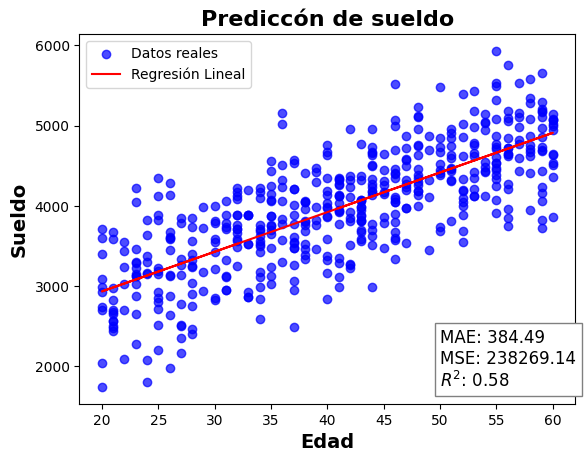

In [36]:
# Agregar métricas al gráfico
plt.text(np.max(X) - 10, min(y) + 0.5,
         f"MAE: {mae:.2f}\nMSE: {mse:.2f}\n$R^2$: {modelo_x.score(X,y):.2f}",
         fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='gray'))

# Visualizar los resultados
plt.scatter(data['Edad'], data['Sueldo'], alpha=0.7, color='blue', label='Datos reales')
plt.plot(data['Edad'], data['Prediccion'], color='red', label='Regresión Lineal')
plt.title('Predicción de sueldo', fontsize=16, fontweight="bold")
plt.xlabel('Edad', fontsize=14, fontweight="bold")
plt.ylabel('Sueldo', fontsize=14, fontweight="bold")
plt.legend()
plt.show()

✅ **Interpretaciones**

**R² = 0.58 (Coeficiente de determinación):**

+ Aproximadamente 58% de la variabilidad del sueldo puede explicarse por la edad.

+ Es una relación moderada, lo que sugiere que hay otros factores importantes que también influyen en el sueldo (por ejemplo, estudios, experiencia, industria, entre otros posibles factores).

**MAE y MSE:**

+ MAE (Error absoluto medio): en promedio, el modelo se equivoca en ~384 unidades monetarias.

+ MSE (Error cuadrático medio): castiga errores grandes más fuertemente (por eso es mayor).

+ Ambas métricas hablan del desempeño predictivo del modelo, siendo MAE más fácil de interpretar directamente.

**Dispersión alrededor de la línea:**

+ Se observa que muchos puntos no caen exactamente sobre la línea, especialmente en edades jóvenes y mayores → hay variabilidad no explicada.

+ Lo anterior se conoce como error o residuo.



In [24]:
print(interpretacion("Regresión lineal", modelo_x.score(X,y), "sueldo", X.columns))

Modelo de regresión Regresión lineal
    57.53% de la variabilidad en sueldo se puede explicar utilizando: ['Edad'].


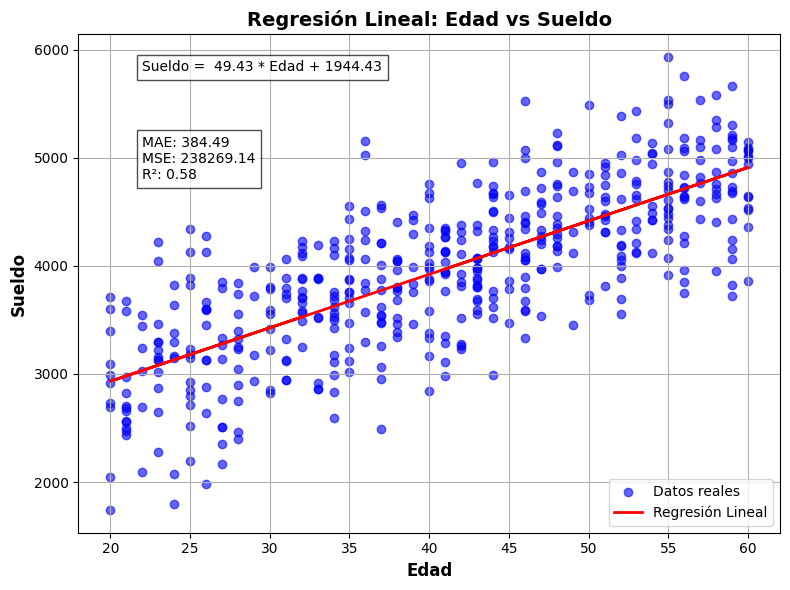

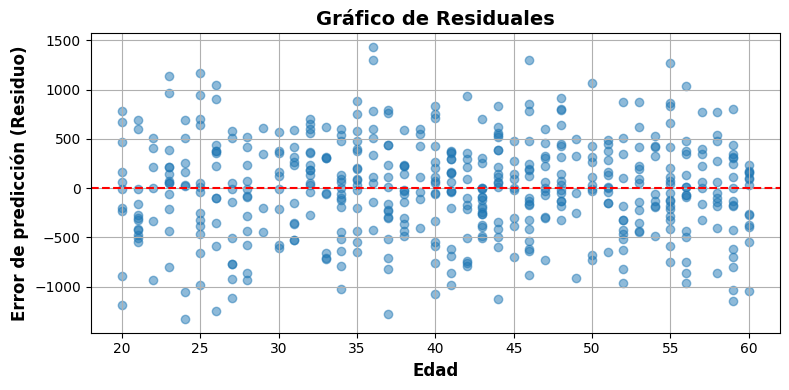

In [25]:
# Coeficientes
a = modelo_x.intercept_
b = modelo_x.coef_[0]

# Gráfico principal junto a la recta de regresión
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label="Datos reales", alpha=0.6)
plt.plot(X, data["Prediccion"], color='red', label="Regresión Lineal", linewidth=2)
plt.title("Regresión Lineal: Edad vs Sueldo", fontsize=14, fontweight='bold')
plt.xlabel("Edad", fontsize=12, fontweight='bold')
plt.ylabel("Sueldo", fontsize=12, fontweight='bold')
plt.legend()

# Ecuación sobre el gráfico
plt.text(22, 5800, f"Sueldo =  {b:.2f} * Edad + {a:.2f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Métricas
plt.text(22, 4800, f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {modelo_x.score(X, y):.2f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de residuales
residuals = y - data['Prediccion']
plt.figure(figsize=(8,4))
plt.scatter(X, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Residuales", fontsize=14, fontweight="bold")
plt.xlabel("Edad", fontsize=12, fontweight="bold")
plt.ylabel("Error de predicción (Residuo)", fontsize=12, fontweight="bold")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ **RECORDATORIO**

Por la simplicidad del ejemplo, el entrenamiento, en este caso, se aplica con el conjunto de datos completo. Sin embargo, en un escenario real, eso DEBE EVITARSE.